<a href="https://colab.research.google.com/github/justinsantacruz/MAT350/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from scipy.io import wavfile

sampling_rate, audio_data = wavfile.read('/content/drive/MyDrive/sample.wav')


In [17]:
fs, data = wavfile.read("/content/drive/MyDrive/sample.wav")

s = data[:, 0] if len(data.shape) > 1 else data #obtain a vector size of 1xN
N = len(s)
T = N / fs #duration of audio

In [19]:
t0 = 0.1
idx_t0 = int(t0 * fs) #number of audio samples elapsed up to time t0

#range of vector entries
window_len = int(0.1 * fs)
idx_start = idx_t0 - window_len // 2 #midpoint of window ligned with audio sample
idx_midpoint = idx_t0
idx_end = idx_t0 + window_len // 2
Nw = window_len

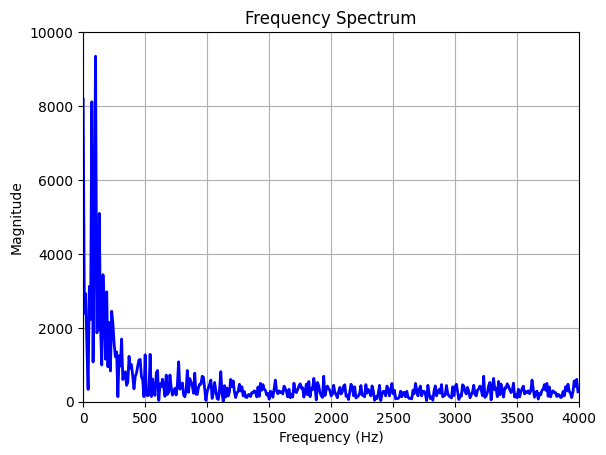

In [27]:
w = s[idx_start:idx_end] #segments to analyze
u = np.fft.fft(w)
freqs = np.fft.fftfreq(Nw, 1/fs)

fig, ax = plt.subplots()
ax.plot(freqs[:Nw//2], np.abs(u)[:Nw//2], color='blue', linewidth=2)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Frequency Spectrum')
ax.set_xlim([0, 4000])
ax.set_ylim([0, 10000])
ax.grid(True)

plt.show()

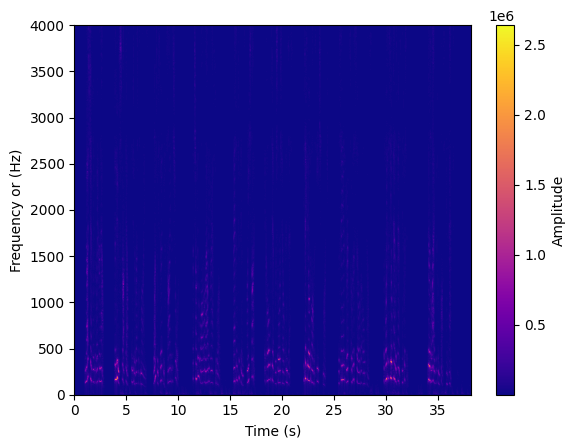

In [28]:
window_centers = np.arange(0.1, T, 0.05)
n_windows = len(window_centers)
spectrogram = np.zeros((n_windows, Nw//2)) #2d array, freq spec by freq val

#fourier transform for each window
for i, center in enumerate(window_centers):
    idx_center = int(center * fs)
    idx_start = idx_center - window_len // 2
    idx_end = idx_center + window_len // 2
    w = s[idx_start:idx_end]
    u = np.fft.fft(w)
    spectrogram[i, :] = np.abs(u)[:Nw//2]

plt.figure()
plt.imshow(spectrogram.T, origin='lower', aspect='auto', cmap='plasma', extent=[0, T, 0, fs/2])
plt.xlabel('Time (s)')
plt.ylabel('Frequency or (Hz)')
plt.colorbar(label='Amplitude')
plt.show()